In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [9]:
#create an random array of size (200,1) in the range of [-3,3]
X = 5* np.random.rand(200,1) - 2
#calculate corresponding Y values 
y = 0.8* X**2 + 0.9 * X + 2 + np.random.randn(200,1)
#y = 0.8x^2 + 0.9x + 2

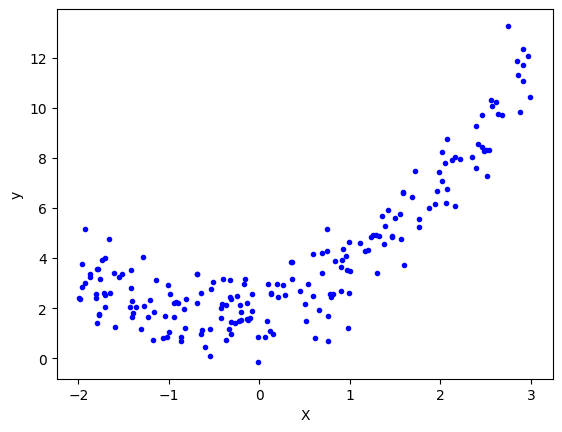

In [11]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6540762214088768

Text(0, 0.5, 'y')

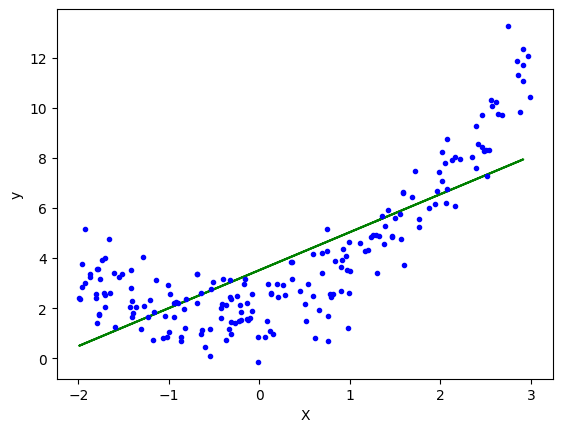

In [17]:
#Applied linear regression let's see the graph
plt.plot(X_train,lr.predict(X_train),color='g')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")


In [18]:
#Applying polynomial regression
poly = PolynomialFeatures(degree = 2)
#with degree 2 for 1 input column X, we get 3 columns such as "X^0, X^1, X^2"
X_train_tran = poly.fit_transform(X_train)
X_test_tran = poly.fit_transform(X_test)

In [19]:
print(X_train[0])
print(X_train_tran[0])

[1.37729079]
[1.         1.37729079 1.89692992]


In [20]:
lr.fit(X_train_tran,y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test_tran)

In [22]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.90132905 0.81428545]]
[1.94270423]


In [24]:
r2_score(y_test,y_pred)

0.8887014993128013

In [26]:
#generate a new array for testing
X_new = np.linspace(-3,3,200).reshape(200,1)
#generated 200 evenly spaced values between -3 and 3
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

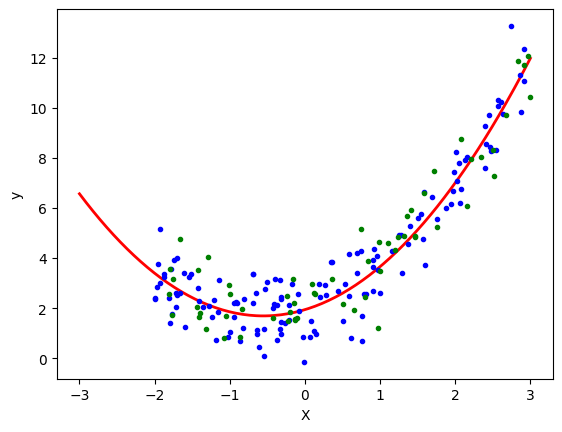

In [28]:
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
#r- indicates a solid red line with width of 2
plt.plot(X_train,y_train,'b.',label='Trainig points')
plt.plot(X_test,y_test,'g.',label='Testing Points')
plt.xlabel("X")
plt.ylabel("y")
plt.show()